
# Decision Treee CLASSIFICATION PROBLEM

In [229]:
#Import all necessary tools
import numpy as np
import pandas as pd

#For Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

import itertools

#For Train Test Split
from sklearn.model_selection import train_test_split

#For Lableling the dataset cols
from sklearn.preprocessing import LabelEncoder

#For Preprocessing --> We Don't need this for Decision Tree
from sklearn.preprocessing import StandardScaler

#For Handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#For Counter lib
from collections import Counter

#For Decision Tree Algo
from sklearn.tree import DecisionTreeClassifier

#For Viewing the tree
from sklearn import tree

#For Error Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

#For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [230]:
#Import Dataset from the corresponding path
df = pd.read_csv('C:/Users/kqsr247/Box Sync/Learning/01_IBM_AI_ENGINEER/01_Machine_Learning_with_Python/Final_Project/Data/loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [231]:
#Lets Drop the unwanted column [unnamed]
df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1,inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [232]:
#Convert Datetime into correspoding datatype
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [233]:
#checking the info of the dataset --> It has 346 Rows and 10 Cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_status     346 non-null    object        
 1   Principal       346 non-null    int64         
 2   terms           346 non-null    int64         
 3   effective_date  346 non-null    datetime64[ns]
 4   due_date        346 non-null    datetime64[ns]
 5   age             346 non-null    int64         
 6   education       346 non-null    object        
 7   Gender          346 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 21.8+ KB


In [234]:
#Checking the Nulls in Dataset --> No NULL's in dataset
df.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

# Data visualization and pre-processing

<AxesSubplot:xlabel='loan_status', ylabel='count'>

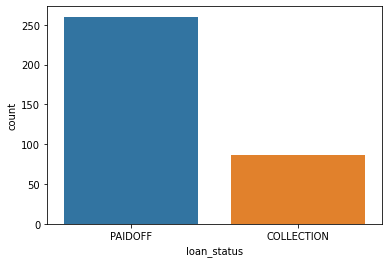

In [8]:
#Univariate analysis target --> PAIDOFF is around 250 and COLLECTION is around 80. So the data is imbalanced
sns.countplot(df['loan_status'])

As we can able to see that the 'PAIDOFF' data samples are around 3 time larger than the 'COLLECTION' data samples.
Hence, We don't have a balanced dataset. Imbalanced dataset can affect your model accuracy by around and more than 50%.

We will balance them using one of the resampling techniques (undersampling,oversampling or SMOTE)  once we spilt the data for train and test.

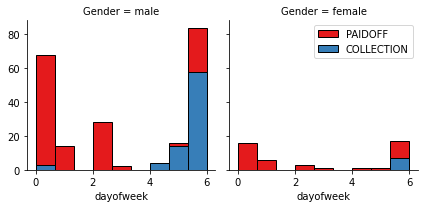

In [235]:
#Let's look at the day of the week people get the loan
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [236]:
#Adding weekend column by considering weekdays >3 as weekends
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


We see that people who get the loan at the end of the week don't pay it off, and particularly after day 4

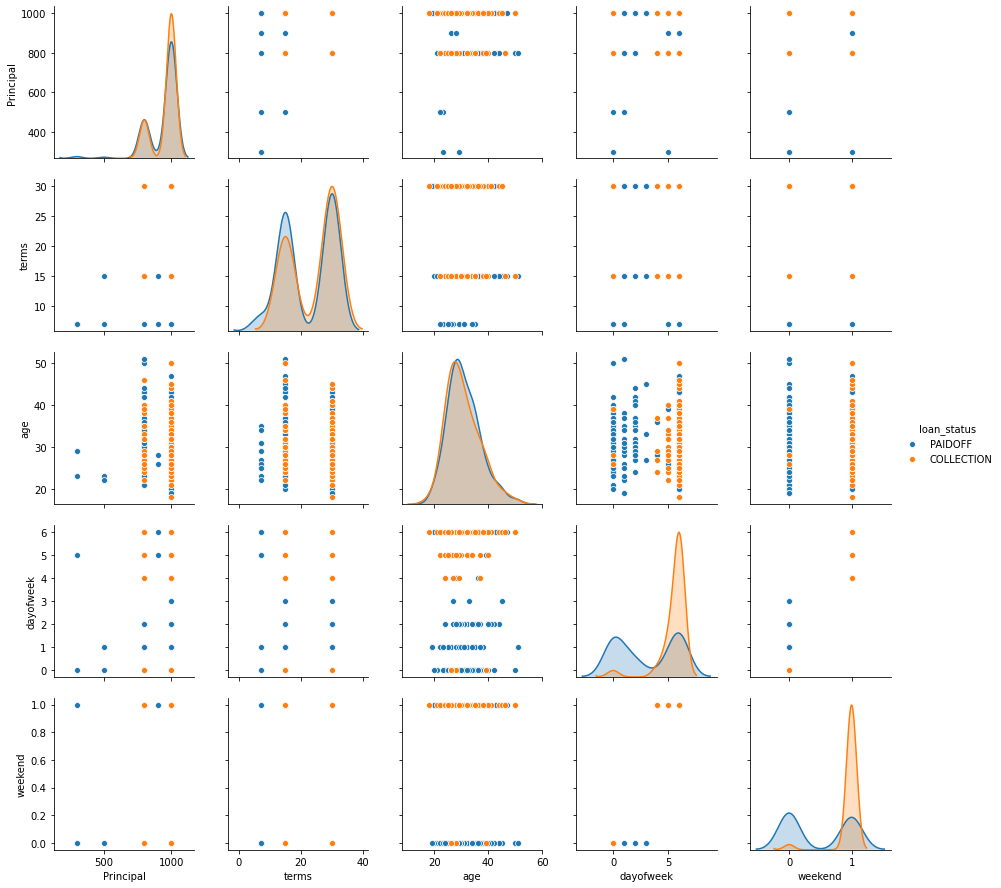

In [11]:
#Pair Plot to identify Relationship
sns.pairplot(df,hue='loan_status')

<AxesSubplot:xlabel='age'>

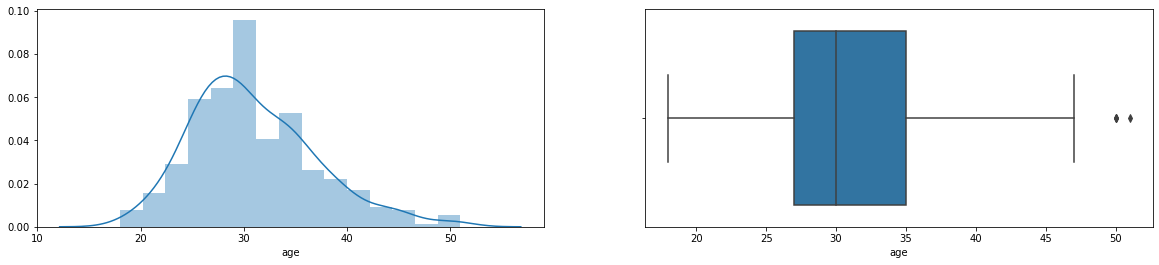

In [91]:
#Univariate analysis age.
f = plt.figure(figsize=(20,4))
f.add_subplot(1,2,1)
sns.distplot(df['age'])
f.add_subplot(1,2,2)
sns.boxplot(df['age'])

1) Displot Shows that the density of the data lies in the range of 25-35 years and very rarely people aged 20 years or below or 50 years and above.

2) The boxplot is showing some outliers which we can deal later

In [237]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

In [238]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

## Convert Categorical features to numerical values (D Tree can handle Categorical data as well)


Let's convert the Dependent Variable alone

In [239]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [242]:
#Using Labling Technique
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['education_n'] = le_education.fit_transform(df['education'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,education_n
0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,1
1,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,0
2,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,3
3,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,3
4,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,3


In [244]:
df = df[['Principal','terms','age','Gender','dayofweek','weekend','education_n','loan_status']]
df.head()

,Principal,terms,age,Gender,dayofweek,weekend,education_n,loan_status
0,1000,30,45,0,3,0,1,0
1,1000,30,33,1,3,0,0,0
2,1000,15,27,0,3,0,3,0
3,1000,30,28,1,4,1,3,0
4,1000,30,29,0,4,1,3,0


# Feature Selection



In [245]:
#Defining X form the Feature Dataset
X = df.iloc[:,:-1]
X.head()

,Principal,terms,age,Gender,dayofweek,weekend,education_n
0,1000,30,45,0,3,0,1
1,1000,30,33,1,3,0,0
2,1000,15,27,0,3,0,3
3,1000,30,28,1,4,1,3
4,1000,30,29,0,4,1,3


In [246]:
y = df.loan_status
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

# Train Test Split


In [247]:
#Spliting Data for Training and testing
#please import 'from sklearn.model_selection import train_test_split' if not 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(276, 7)
(70, 7)
(276,)
(70,)


# Handling Imbalanced Dataset

There are 3 major techniques for balancing the imbalanced Dataset

1) Undersampling - It will reduce the number of majority data to match the minority data. For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will downsample the 'Postive' values to '100' to match the number of 'Negative' values. If we use this technique, there is a chance of missing the large part of actual data.

2) Oversampling - It will increase the number of minority data to match the majority data by duplicating.For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will create duplicated or oversample the 'Negative' values from 100 to 1000 to match the 'Positive' values. If we use this technique, there is a chance of getting overfited model.

3) SMOTE (Synthetic Minority Oversampling Technique) - It will increase the number of minority data to match the majority data by Synthetically taking the average of Minority data.For eg: In our dependent feature, if we have '1000' Positive values and '100' Negative values, It will create Synthetic average for the 'Negative' values from 100 to 1000 to match the 'Positive' values. It will not duplicate the values.   

I am going to use 'SMOTE' in this case 

#### Note that you need to use these techniques only for the Training set and not the Test set

In [249]:
#Lets check the Train Data Before Sampling
print("'y' Samples Before Sampling : " , Counter(y_train))
print("X_train Shape: " , X_train.shape)
print("y_train Shape: " , y_train.shape)

'y' Samples Before Sampling :  Counter({0: 204, 1: 72})
X_train Shape:  (276, 7)
y_train Shape:  (276,)


#### Let's do oversampling to improve the data balance

In [250]:
#pip install imblearn --> use if you haven't installed imblearn
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [251]:
#Lets check the Train Data after sampling
print("'y' Samples Before Sampling : " , Counter(y_train))
print("X_train Shape: " , X_train.shape)
print("y_train Shape: " , y_train.shape)

'y' Samples Before Sampling :  Counter({0: 204, 1: 204})
X_train Shape:  (408, 7)
y_train Shape:  (408,)



#### We could able to see the dataset is balanced now





# Model Creation, Train and Test

In [254]:
#Decision Algo -> Lets check with default Params
dt = DecisionTreeClassifier(random_state=42)

#Training the model.
dt.fit(X_train, y_train)

#Predict test data set.
y_pred = dt.predict(X_test)

#### Hyperparameters of Decision Tress (Taken from Scikit-Learn Documentation)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)[source]¶

### Let's view the constructed tree

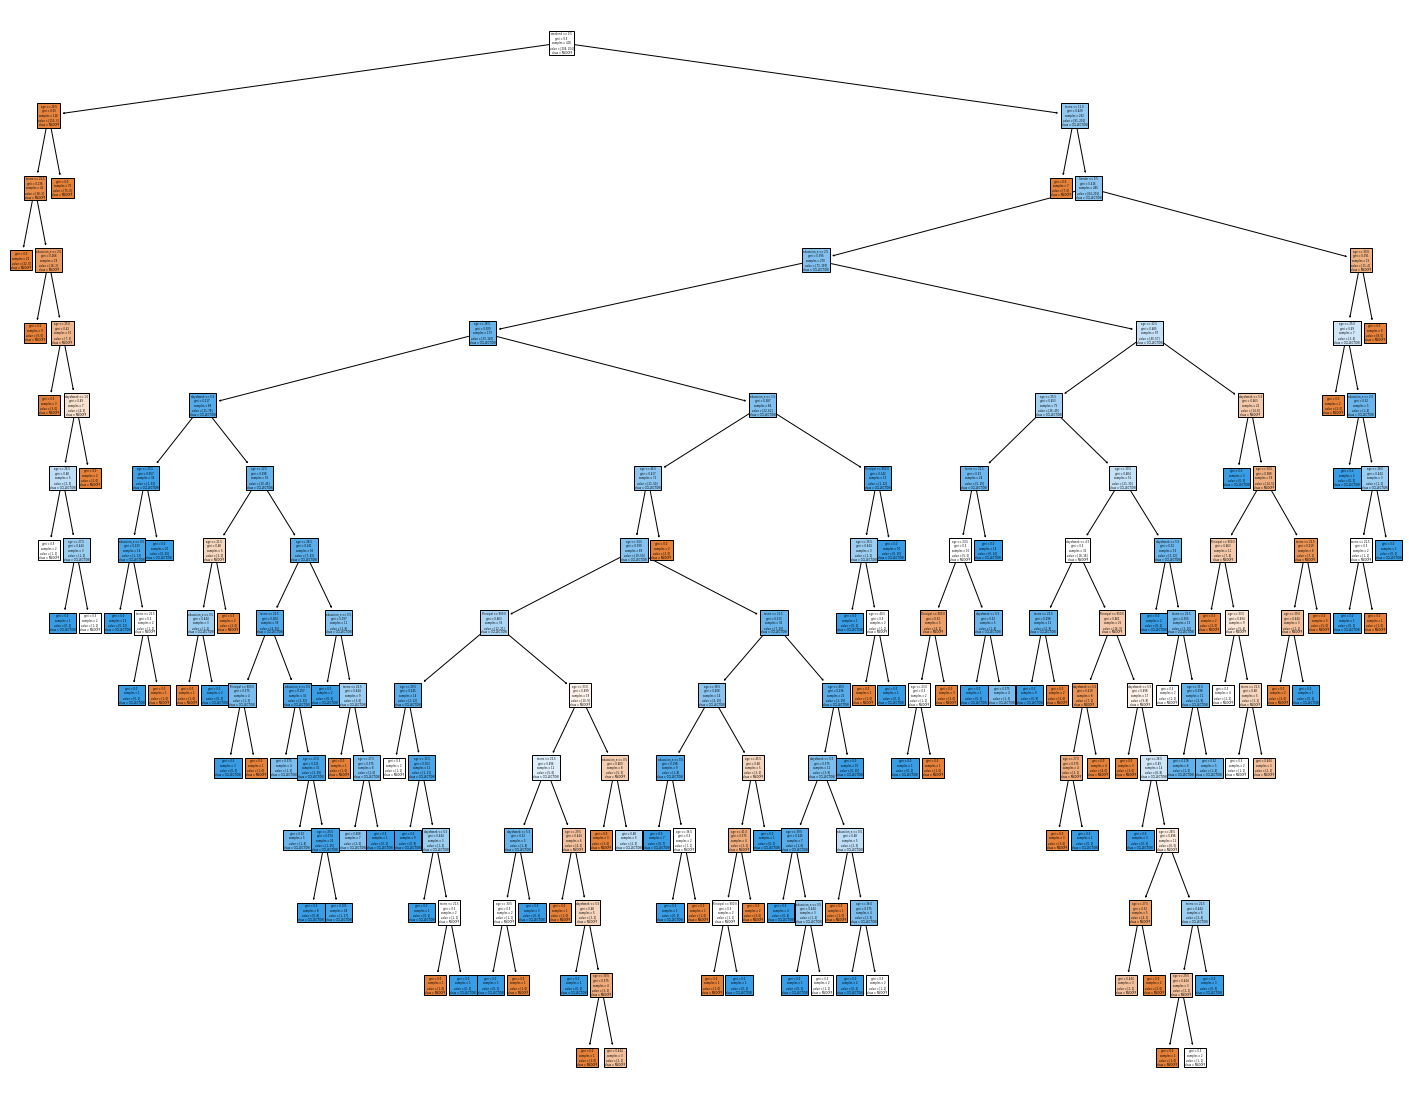

In [253]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names=X.columns, class_names=["PAIDOFF","COLLECTION"], filled=True)

# Model Evaluation

In [255]:
#Checking performance our model with Confusion Metrics
print(confusion_matrix(y_test,y_pred))

[[43 13]
 [ 4 10]]


In [256]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        56
           1       0.43      0.71      0.54        14

    accuracy                           0.76        70
   macro avg       0.67      0.74      0.69        70
weighted avg       0.82      0.76      0.78        70



In [257]:
#Checking performance our model with ROC Score.
roc_auc_score(y_test, y_pred)

0.7410714285714286

In [258]:
#Checking performance our model with accuracy score 
accuracy_score(y_test, y_pred)

0.7571428571428571

In [259]:
#Checking performance our model with F1 score 
f1_score(y_test, y_pred)

0.5405405405405405

As we could see F1 score is very low, we can tune the hyperparameters and check the score again.

# Helper Functions for Model Evaluation and Tree formation


Creating some helper functions for evaluation of the model to reduce code

In [260]:
#For creating Tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=["PAIDOFF","COLLECTION"], filled=True)

In [261]:
#For Model Evalution
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print()
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print()
    print("Train Classification Report:")
    print(classification_report(y_train, dt_classifier.predict(X_train)))
    print()
    print("-"*100)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print()
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print()
    print("Train Classification Report:")
    print(classification_report(y_test, dt_classifier.predict(X_test)))

# Hyperparameter Tuning and Fiting in the model (Choosing Random Params).


Let's use some random hyperparameter for getting the results

### Specifying Depth before split

In [262]:
#Let's use 'max_depth' as '3'
dt_default = DecisionTreeClassifier(max_depth=3, random_state = 42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

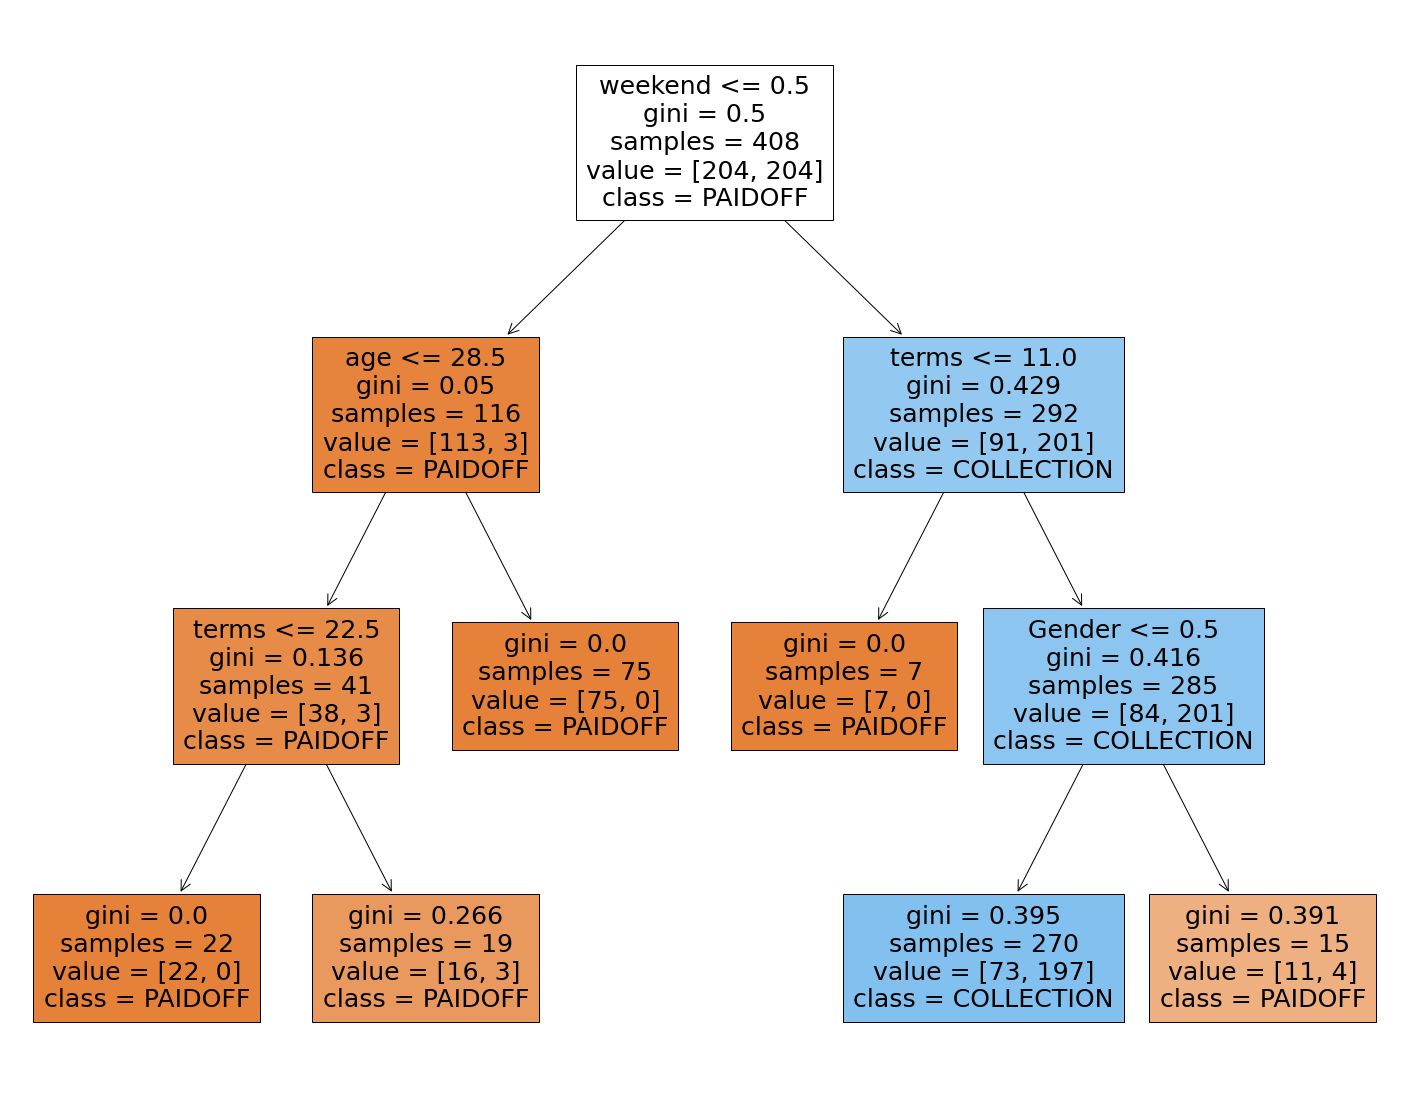

In [263]:
#Graph for 'max_depth' as '3'
gph = get_dt_graph(dt_default)

In [265]:
#Error for 'max_depth' as '3'
evaluate_model(dt_default)

Train Accuracy : 0.803921568627451

Train Confusion Matrix:
[[131  73]
 [  7 197]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.77       204
           1       0.73      0.97      0.83       204

    accuracy                           0.80       408
   macro avg       0.84      0.80      0.80       408
weighted avg       0.84      0.80      0.80       408


----------------------------------------------------------------------------------------------------
Test Accuracy : 0.6

Test Confusion Matrix:
[[32 24]
 [ 4 10]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        56
           1       0.29      0.71      0.42        14

    accuracy                           0.60        70
   macro avg       0.59      0.64      0.56        70
weighted avg       0.77      0.60      0.64        70



### Specifying minimum samples before split

In [266]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state = 42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

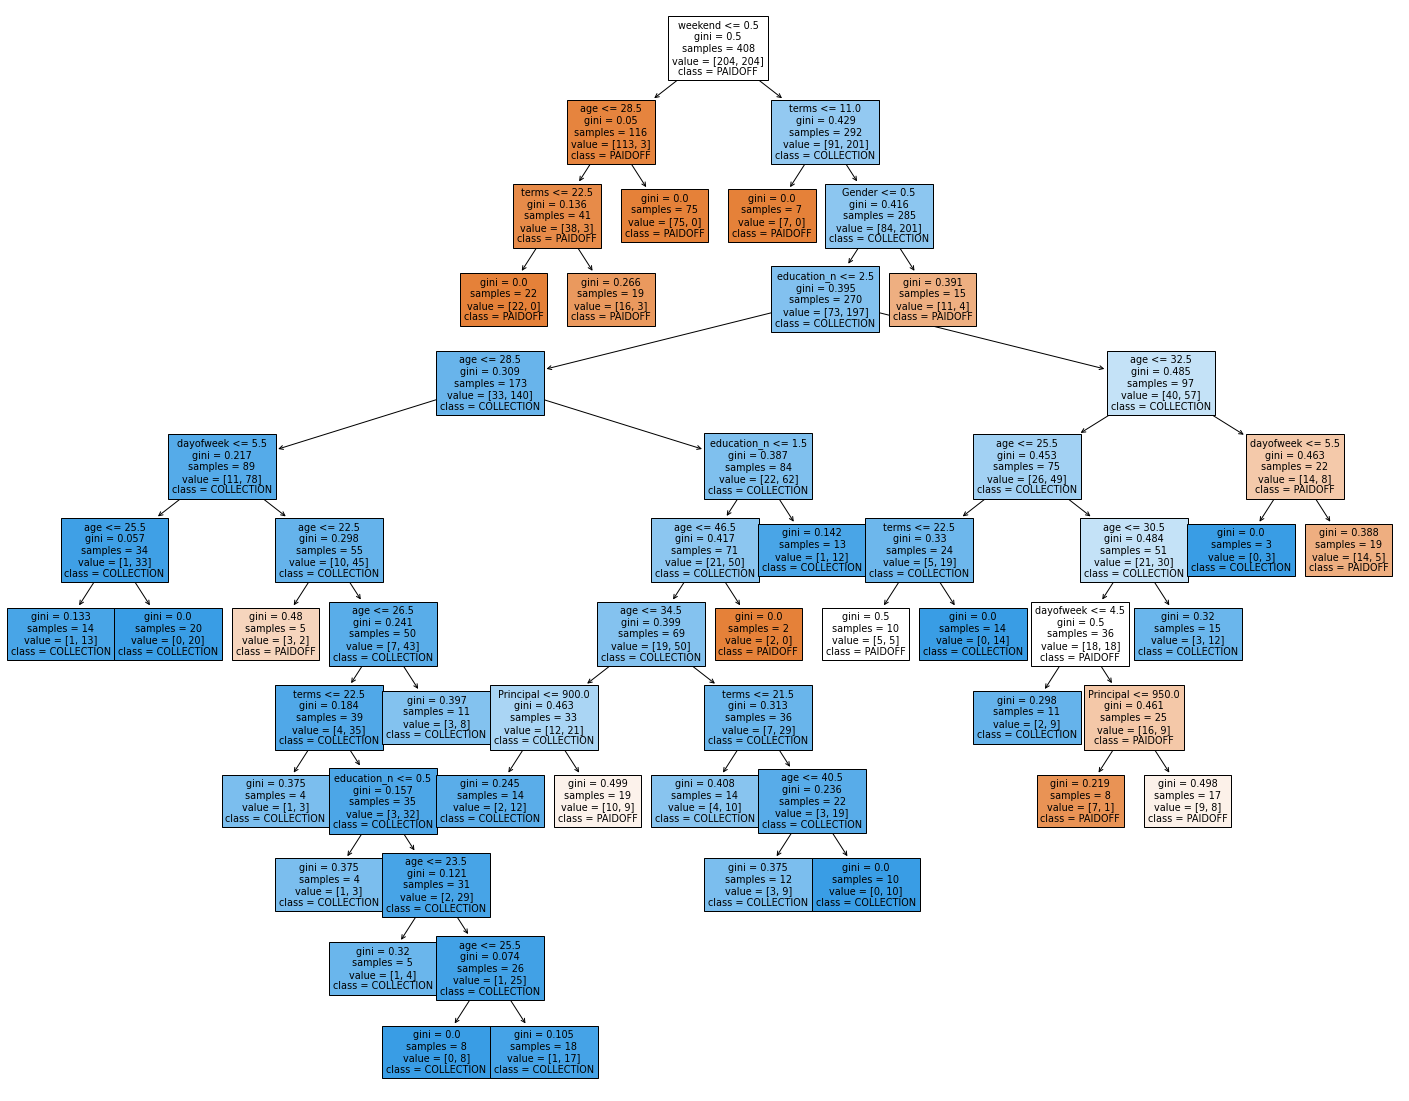

In [267]:
gph = get_dt_graph(dt_min_split)

In [268]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8529411764705882

Train Confusion Matrix:
[[181  23]
 [ 37 167]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       204
           1       0.88      0.82      0.85       204

    accuracy                           0.85       408
   macro avg       0.85      0.85      0.85       408
weighted avg       0.85      0.85      0.85       408


----------------------------------------------------------------------------------------------------
Test Accuracy : 0.7428571428571429

Test Confusion Matrix:
[[46 10]
 [ 8  6]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        56
           1       0.38      0.43      0.40        14

    accuracy                           0.74        70
   macro avg       0.61      0.62      0.62        70
weighted avg       0.76      0.74      0.75        70



### Specifying minimum samples in leaf node

In [269]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

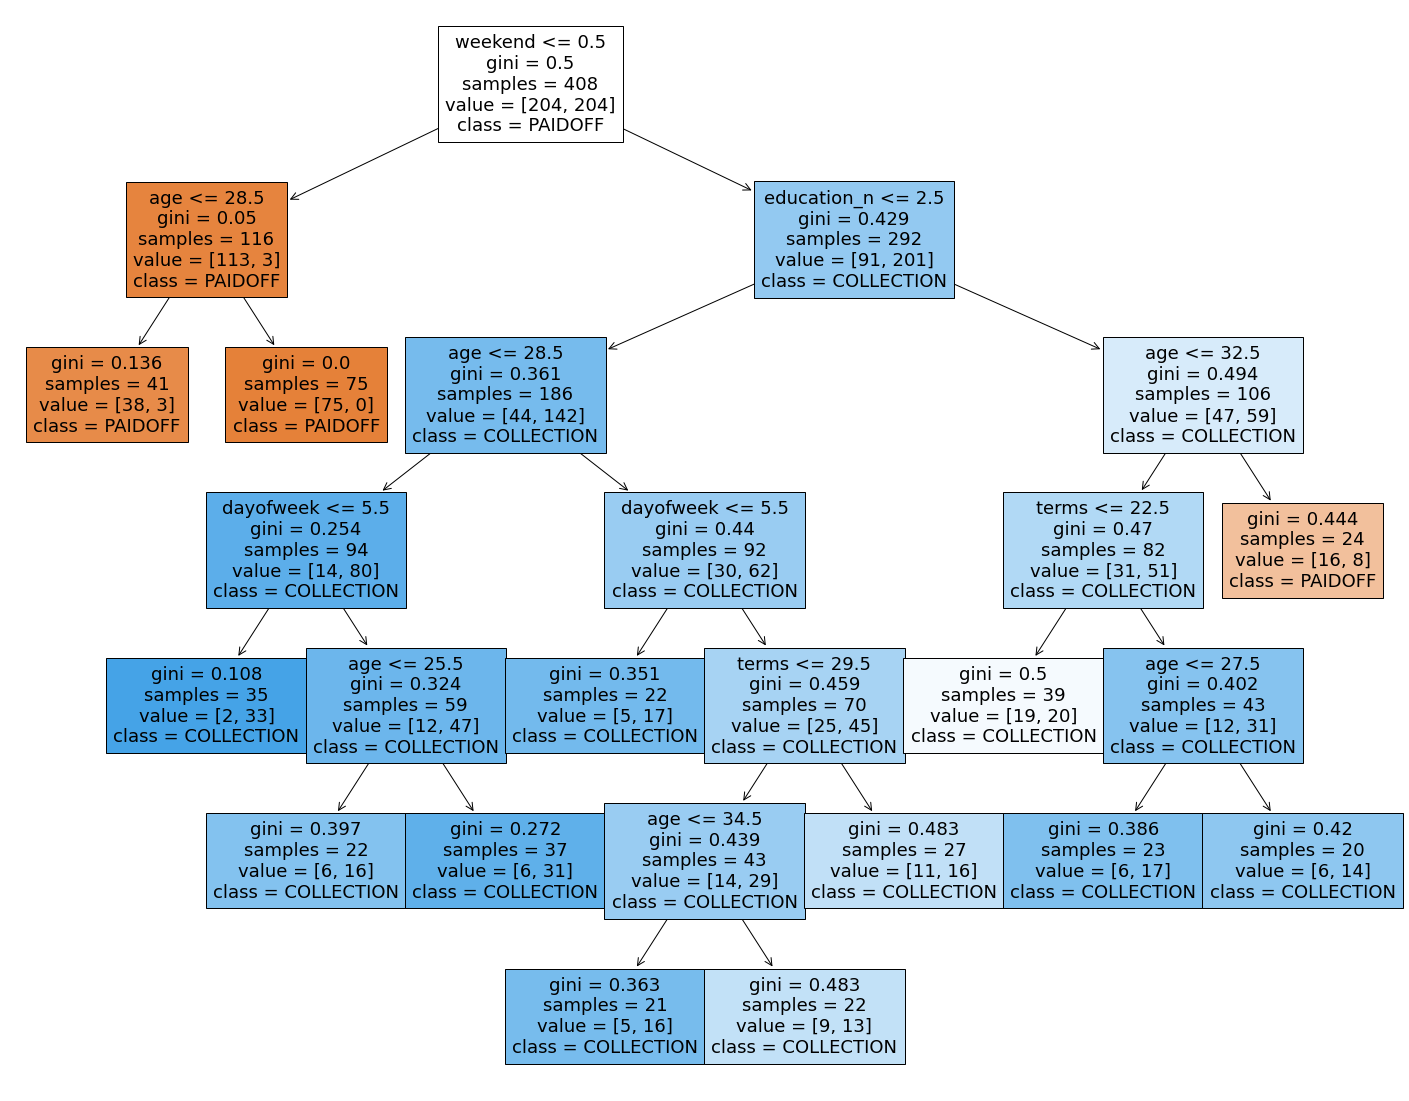

In [270]:
gph = get_dt_graph(dt_min_leaf)

In [271]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7892156862745098

Train Confusion Matrix:
[[129  75]
 [ 11 193]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       204
           1       0.72      0.95      0.82       204

    accuracy                           0.79       408
   macro avg       0.82      0.79      0.78       408
weighted avg       0.82      0.79      0.78       408


----------------------------------------------------------------------------------------------------
Test Accuracy : 0.5857142857142857

Test Confusion Matrix:
[[30 26]
 [ 3 11]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.54      0.67        56
           1       0.30      0.79      0.43        14

    accuracy                           0.59        70
   macro avg       0.60      0.66      0.55        70
weighted avg       0.79      0.59      0.63        70



# Hyperparameter Tuning using GridsearchCV

In [293]:
#For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
max_depth = [2, 3, 5, 7, 10,20]
min_samples_split =[5, 10, 20, 50, 100]
criterion = ["gini", "entropy"]

#Convert to dictionary
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, criterion=criterion)

#Create new DT object
dt = DecisionTreeClassifier(random_state=42)

#Use GridSearch 
clf = GridSearchCV(estimator=dt, param_grid=hyperparameters, cv=5, n_jobs=-1)
#CV - Cross Validation no - It will consider 4 mutually exclusive sets
#n_jobs = The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors


#Fit the model
best_model = clf.fit(X_train, y_train)

In [294]:
# find the best score
best_model.best_score_

0.8017163504968383

In [295]:
# get the hyperparameters with the best score
best_model.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}

# Re-Training and Evaluating the model with GridsearchCV Hyperparameters

In [296]:
#DT Algo
dt_with_tuned_param = DecisionTreeClassifier(criterion='gini', max_depth = 20, min_samples_split = 5, random_state=42)

#Training the model.
dt_with_tuned_param.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, min_samples_split=5, random_state=42)

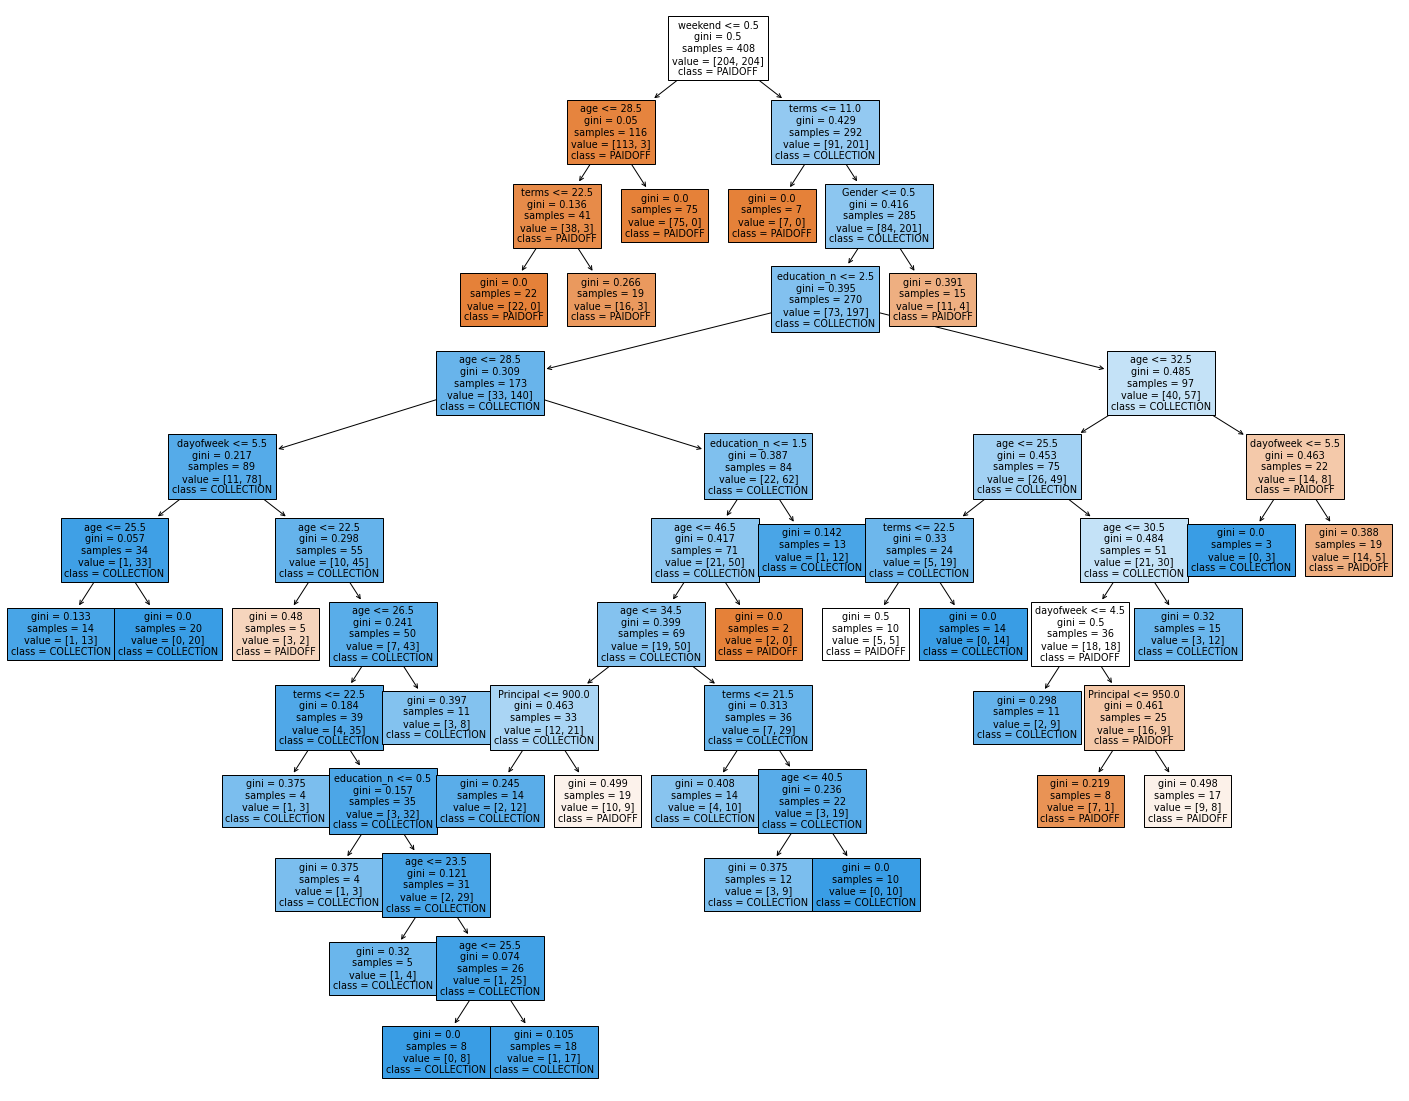

In [286]:
#Tree graph for tuned model
gph = get_dt_graph(dt_with_tuned_param)

In [297]:
#Metrics for Tuned Model
evaluate_model(dt_with_tuned_param)

Train Accuracy : 0.9142156862745098

Train Confusion Matrix:
[[186  18]
 [ 17 187]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       204
           1       0.91      0.92      0.91       204

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408


----------------------------------------------------------------------------------------------------
Test Accuracy : 0.6857142857142857

Test Confusion Matrix:
[[40 16]
 [ 6  8]]

Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        56
           1       0.33      0.57      0.42        14

    accuracy                           0.69        70
   macro avg       0.60      0.64      0.60        70
weighted avg       0.76      0.69      0.71        70



# Conclusion

As you can see, there is a slight better f1 score. And also you can able to see the results of 'classification_report' is also increaced slightly.


But even though the performance has improved, I am not sure about my model prediction rate. I could see the overfitting. We need to try with different pram tuning for optimizing and making the model generalized